In [1]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/citrus.csv')

In [3]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()

In [6]:
scaler.fit(df.drop('name',axis=1))

StandardScaler()

In [7]:
trans=scaler.transform(df.drop('name',axis=1))

In [ ]:
trans

array([[-3.60195018, -3.02255396,  1.73997781,  0.76780981, -1.03337209],
       [-3.11420697, -2.978392  ,  1.16484825,  0.16992022, -0.92300682],
       [-2.85236589, -2.73464536,  0.20629897,  0.42615862, -1.03337209],
       ...,
       [ 2.88246734,  2.78833864,  1.3565581 ,  0.51157142,  0.95320276],
       [ 3.05189393,  2.91295068, -1.13567001, -0.34255657, -0.04008467],
       [ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209]])

In [8]:
new=pd.DataFrame(trans,columns=df.columns[:-1])

In [9]:
new

,name,diameter,weight,red,green
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [10]:
from sklearn.model_selection import train_test_split
x=new
y=df['name']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn=KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
Pred=knn.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test,Pred))

[[1352  169]
 [ 167 1312]]
              precision    recall  f1-score   support

  grapefruit       0.89      0.89      0.89      1521
      orange       0.89      0.89      0.89      1479

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In [18]:
error_rate=[]

for i in range (1,40):
   knn=KNeighborsClassifier(n_neighbors=i)   
   knn.fit(x_train,y_train)
   pred_i=knn.predict(x_test)   
   error_rate.append(np.mean(pred_i !=y_test))

In [19]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

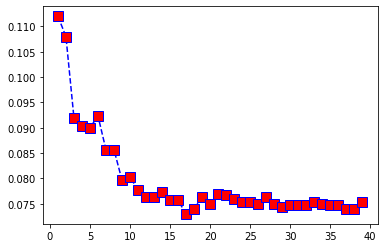

In [20]:
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='s', markerfacecolor='red',markersize=10)

In [21]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [22]:
from matplotlib import markers

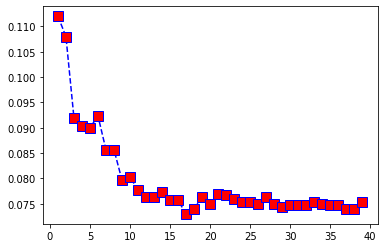

In [23]:
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='s', markerfacecolor='red',markersize=10)

In [24]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred_i=knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test,Pred))

[[1352  169]
 [ 167 1312]]
              precision    recall  f1-score   support

  grapefruit       0.89      0.89      0.89      1521
      orange       0.89      0.89      0.89      1479

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

